In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(12,9)})

from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 0. Описание задачи
Необходимо создать модель машинного обучения, которая сможет классифицировать кредитный рейтинг, основываясь на данных о клиенте. Целевой класс содержит 3 категории: плохой, станадартный и хороший рейтинг.
       
Кроме того, нужно провести очистку данных от пропущенных и некорректных значений и привести их к стандартизированному виду, а также провести начальный разведочный анализ.

# 1. Чтение данных

In [2]:
data = pd.read_csv('data/train.csv')

C:\Users\Win10_Game_OS\AppData\Local\Temp\ipykernel_208\2801730928.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train.csv')


In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# 2. Обработка пропущенных значений

    Удалим переменные, не несущие никакой пользы для построения модели:

In [5]:
data = data.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan', 'Monthly_Inhand_Salary'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   object 
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

    Проверим количество пропущенных значений в каждом столбце:

In [6]:
data.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit           0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

    Удалим пропущенные значения:

In [7]:
data = data.dropna()
data.shape

(78287, 21)

# 3. Чистка данных

In [8]:
intFeatures = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Card', 'Num_Bank_Accounts', 'Interest_Rate', 'Delay_from_due_date']
floatFeatures = ['Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
binaryFeatures = ['Payment_of_Min_Amount']
categoricalFeatures = ['Occupation', 'Payment_Behaviour', 'Credit_Mix', 'Credit_Score']

### Числовые данные

    Переведем кредитную историю из строкого представление в числовое.

In [9]:
def parseCreditHistoryAge(creditHistoryAge):
    (age, month) = [int(s) for s in creditHistoryAge.split() if s.isdigit()]
    return age*12 + month

In [10]:
data['Credit_History_Age'] = data['Credit_History_Age'].apply(parseCreditHistoryAge)

    Преобразуем числовые данные, которые представлены в датасете в виде строк.
    Данные, которые не поддаются преобразованию типов, дополнительно обработаем.

In [11]:
def findValueErrorsInt(Series):
    valueErrors = []
    for value in Series:
        try:
            int(value)
        except ValueError:
            valueErrors.append(value)
    return valueErrors

def findValueErrorsFloat(Series):
    valueErrors = []
    for value in Series:
        try:
            float(value)
        except ValueError:
            valueErrors.append(value)
    return valueErrors

In [12]:
for feature in intFeatures:
    print(feature + ' : ' + str(findValueErrorsInt(data[feature])[:5]))
    
for feature in floatFeatures:
    print(feature + ' : ' + str(findValueErrorsFloat(data[feature])[:5]))

Age : ['28_', '34_', '30_', '24_', '33_']
Num_of_Loan : ['0_', '3_', '3_', '2_', '5_']
Num_of_Delayed_Payment : ['8_', '3_', '3_', '2_', '13_']
Num_Credit_Card : []
Num_Bank_Accounts : []
Interest_Rate : []
Delay_from_due_date : []
Annual_Income : ['34847.84_', '30689.89_', '114838.41_', '88640.24_', '54392.16_']
Outstanding_Debt : ['3818.57_', '343.84_', '1755.81_', '2593.44_', '89.62_']
Amount_invested_monthly : ['__10000__', '__10000__', '__10000__', '__10000__', '__10000__']
Monthly_Balance : ['__-333333333333333333333333333__', '__-333333333333333333333333333__', '__-333333333333333333333333333__', '__-333333333333333333333333333__', '__-333333333333333333333333333__']
Changed_Credit_Limit : ['_', '_', '_', '_', '_']


In [13]:
data = data.loc[list(~(data['Monthly_Balance'] == '__-333333333333333333333333333__')), :]
data[intFeatures + floatFeatures] = data[intFeatures + floatFeatures].replace('_', '', regex=True)

In [14]:
(data[intFeatures + floatFeatures] == '').sum()

Age                           0
Num_of_Loan                   0
Num_of_Delayed_Payment        0
Num_Credit_Card               0
Num_Bank_Accounts             0
Interest_Rate                 0
Delay_from_due_date           0
Annual_Income                 0
Outstanding_Debt              0
Amount_invested_monthly       0
Monthly_Balance               0
Changed_Credit_Limit       1647
dtype: int64

In [15]:
data = data.loc[list(~(data['Changed_Credit_Limit'] == '')), :]

In [16]:
data[intFeatures] = data[intFeatures].astype(int)
data[floatFeatures] = data[floatFeatures].astype(float)

In [17]:
nonNegFeatues = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Card',
                 'Num_Bank_Accounts', 'Interest_Rate',  'Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly']
data = data.loc[list((data[nonNegFeatues] >= 0).all(1)), :]

### Бинарные данные


In [18]:
for feature in binaryFeatures:
    print(feature + ' : ' + str(data[feature].unique()))

Payment_of_Min_Amount : ['No' 'NM' 'Yes']


In [19]:
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map({'NM': 0, 'No': 0, 'Yes': 1})

### Категориальные данные

    Удалим некоррeктные данные.

In [20]:
for feature in categoricalFeatures:
    print(feature + ' : ' + str(data[feature].unique()))

Occupation : ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Payment_Behaviour : ['High_spent_Small_value_payments' 'Low_spent_Small_value_payments'
 '!@9#%8' 'High_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Large_value_payments']
Credit_Mix : ['_' 'Good' 'Standard' 'Bad']
Credit_Score : ['Good' 'Standard' 'Poor']


In [21]:
m = ((data['Occupation'] == '_______') |
     (data['Credit_Mix'] == '_') | 
     (data['Payment_Behaviour'] == '!@9#%8'))
data = data.loc[list(~m), :]

# 4. Обработка выбросов

In [22]:
data.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,49637.000000,4.963700e+04,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000,49637.000000
mean,116.922538,1.760487e+05,16.827709,22.567661,75.310313,6.943913,21.139654,31.139473,10.453483,26.892419,1428.572823,32.314306,220.972581,0.526039,1417.383728,628.060661,401.620797
std,690.656333,1.430126e+06,116.972682,128.686098,480.096658,58.434482,14.872067,226.629849,6.806300,188.108647,1157.428371,5.093644,99.421134,0.499327,8315.879149,2038.695459,212.998802
min,14.000000,7.005930e+03,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.440000,0.000000,0.230000,20.881250,1.000000,0.000000,0.000000,0.000000,0.131136
25%,24.000000,1.929624e+04,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.360000,3.000000,565.720000,28.102896,145.000000,0.000000,30.419540,73.543184,269.559819
50%,33.000000,3.699053e+04,6.000000,6.000000,14.000000,3.000000,18.000000,14.000000,9.460000,6.000000,1166.880000,32.344357,219.000000,1.000000,68.791602,133.886741,335.899557
75%,42.000000,7.241274e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.000000,9.000000,1954.620000,36.503156,301.000000,1.000000,157.781813,258.420180,469.743475
max,8698.000000,2.419806e+07,1798.000000,1499.000000,5797.000000,1480.000000,67.000000,4397.000000,36.290000,2594.000000,4998.070000,50.000000,404.000000,1.000000,82331.000000,10000.000000,1602.040519


In [23]:
data[intFeatures+floatFeatures].quantile(0.98)

Age                            56.000000
Num_of_Loan                     9.000000
Num_of_Delayed_Payment         25.000000
Num_Credit_Card               183.280000
Num_Bank_Accounts              10.000000
Interest_Rate                 360.840000
Delay_from_due_date            59.000000
Annual_Income              166632.155200
Outstanding_Debt             4632.583200
Amount_invested_monthly     10000.000000
Monthly_Balance              1029.025541
Changed_Credit_Limit           27.332800
Name: 0.98, dtype: float64

In [24]:
data = data.loc[list((data[intFeatures+floatFeatures] <= data[intFeatures+floatFeatures]. \
           quantile(0.98)).all(1)), :]

# 5. Разведочный анализ данных

In [25]:
data.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000,41289.000000
mean,33.413839,48237.246845,5.284701,5.789169,14.330815,3.393398,19.944901,13.097169,9.985369,26.597980,1302.520640,32.226949,226.663445,0.516263,1427.255551,626.479930,391.343916
std,10.872669,34987.436576,2.548533,6.755834,11.304937,2.337621,13.601807,6.014849,6.189590,187.635085,1011.344679,5.035259,97.245413,0.499741,8333.831429,2036.683283,184.549644
min,14.000000,7005.930000,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.440000,0.000000,0.230000,20.881250,2.000000,0.000000,0.000000,0.000000,0.131136
25%,24.000000,19397.600000,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.300000,3.000000,542.260000,28.049951,155.000000,0.000000,29.295467,73.203929,272.213550
50%,33.000000,36137.590000,5.000000,5.000000,12.000000,3.000000,17.000000,13.000000,9.320000,5.000000,1110.500000,32.255443,224.000000,1.000000,66.210327,133.763800,337.965923
75%,42.000000,69761.430000,7.000000,7.000000,19.000000,5.000000,27.000000,18.000000,14.170000,8.000000,1743.430000,36.413122,306.000000,1.000000,151.287255,259.028895,465.568393
max,56.000000,166621.840000,10.000000,183.000000,360.000000,9.000000,59.000000,25.000000,27.320000,2594.000000,4632.520000,45.752530,404.000000,1.000000,82331.000000,10000.000000,1028.628801


Все переменные, которые как-либо связаны с деньгами (например, Annual_Income и Monthly_Balance) имеют высокую дисперсию.


<AxesSubplot:xlabel='Credit_Score', ylabel='Count'>

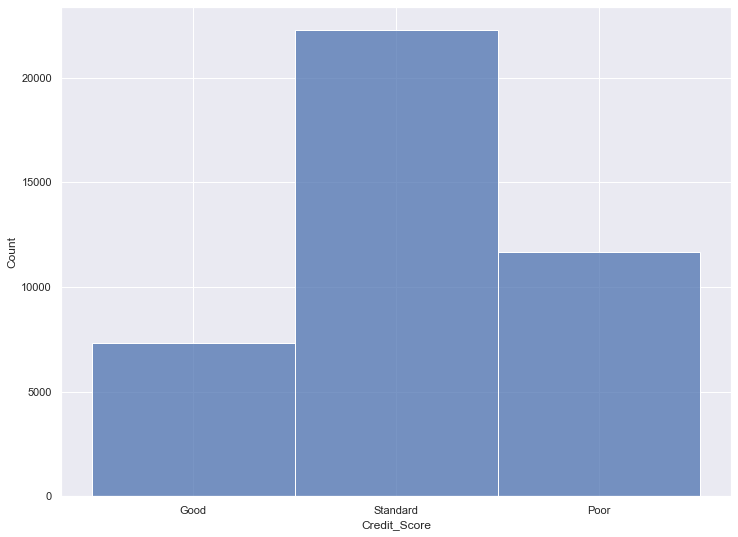

In [51]:
sns.histplot(data=data, x='Credit_Score')

In [27]:
data['Credit_Score'].value_counts()/data.shape[0]

Standard    0.539127
Poor        0.283175
Good        0.177699
Name: Credit_Score, dtype: float64

В данных присутсвует дизбаланс классов. Классы представлены в пропорции 28/54/18

<AxesSubplot:xlabel='Credit_Score', ylabel='Annual_Income'>

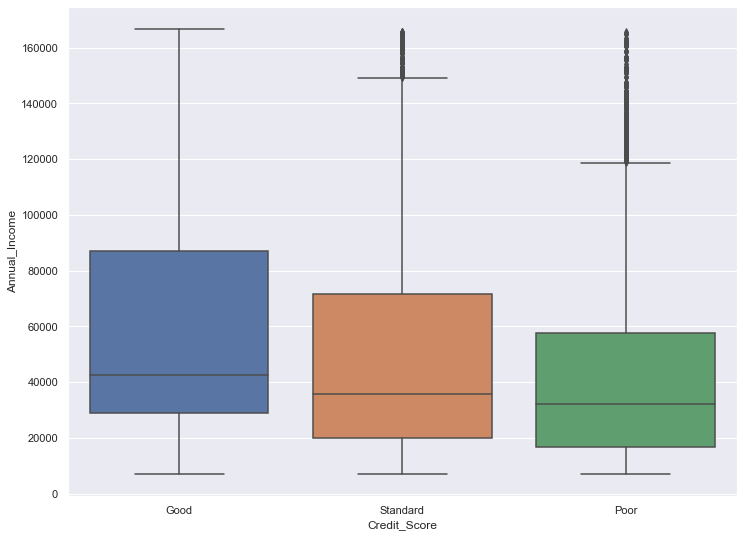

In [52]:
sns.boxplot(data=data, x='Credit_Score', y='Annual_Income')

Чем лучше кредитный рейтинг, тем выше доход (как средняя, так и первый и третий квартили).

Среди людей с плохим кредитным рейтином наблюдатся большое количество выбросов, а значит существует много людей, которые, несмотря на высокий заработок, имеют плохой кредитный рейтинг.

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

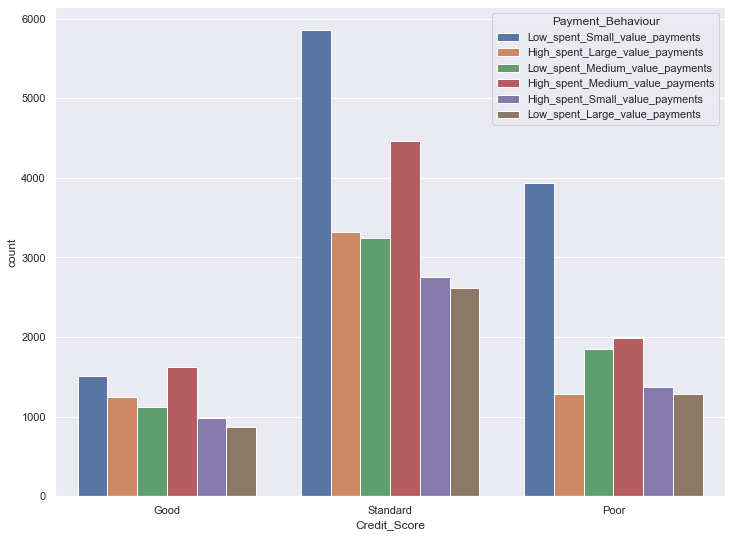

In [53]:
sns.countplot(data=data, x = 'Credit_Score', hue='Payment_Behaviour')

Среди людей с плохим и стандартным кредитным рейтингом бОльшая часть - люди, которые имеют малый заработок и плохие выплаты.

С хорошим кредитным рейтингом меньше всего людей с большими тратами и плохими выплатами а также с большими выплатами и малыми тратами.

<AxesSubplot:>

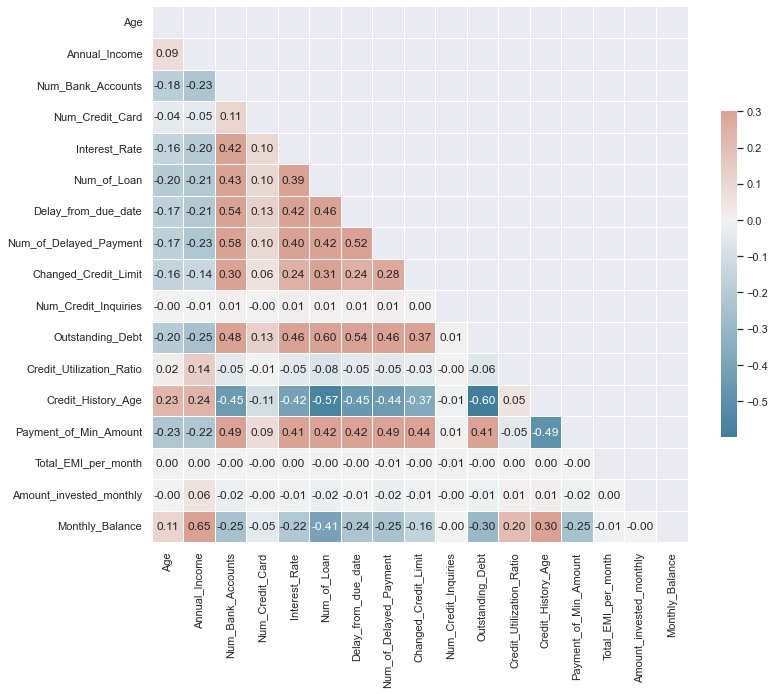

In [56]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt='.2f', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Среди переменных нет сильной корреляции, поэтому нельзя удалить ненужные (коррелированные).

<AxesSubplot:xlabel='Annual_Income', ylabel='Monthly_Balance'>

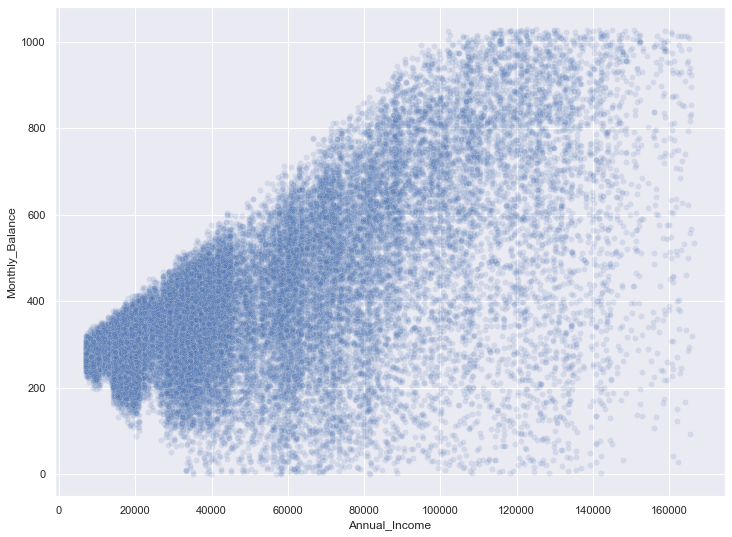

In [57]:
sns.scatterplot(data=data, x='Annual_Income', y='Monthly_Balance', alpha=.15)

Чем выше доход человека, тем выше его месячный баланс.

<AxesSubplot:xlabel='Num_of_Loan', ylabel='Credit_History_Age'>

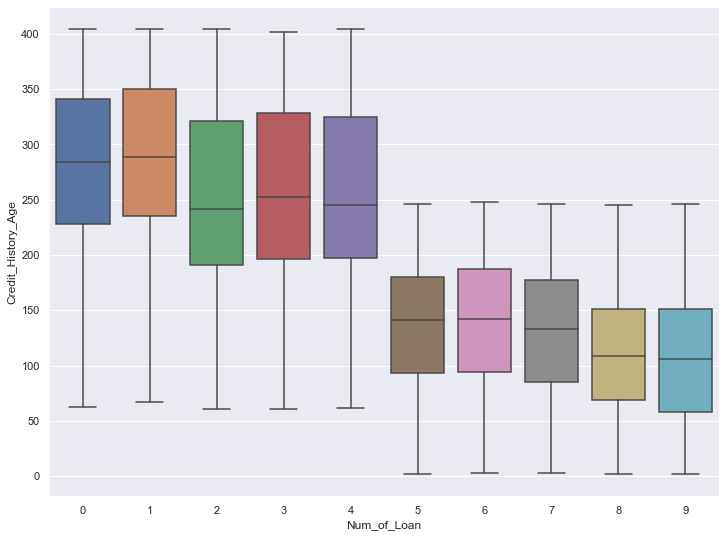

In [58]:
sns.boxplot(data=data, x='Num_of_Loan', y='Credit_History_Age')

Чем больше кредитная история клиента, там больше больше кредитов он брал.

# 6. Кодировка категориальных переменных

In [33]:
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

In [34]:
X = pd.get_dummies(X)
print(X.columns)

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Be

# 7. Разбиение на тренировочную и тестовую выборку

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37160, 41), (4129, 41), (37160,), (4129,))

# 8. Нормализация

In [37]:
X = Normalizer().fit_transform(X)

# 9. Обучение модели

### Подбор гиперпараметров для классификатора ближайших соседей

In [38]:
knn = KNeighborsClassifier()
n_neighbors = np.arange(1, 26, 5)
grid_knn = GridSearchCV(knn, param_grid = {'n_neighbors': n_neighbors},  cv=10, verbose=2)
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.5s
[CV] END ......................................n_neighbors=1; total time=   0.4s
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=1; total time=   0.4s
[CV] END ......................................n_neighbors=1; total time=   0.3s
[CV] END ......................................n_neighbors=6; total time=   0.3s
[CV] END ......................................n

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  6, 11, 16, 21])},
             verbose=2)

In [39]:
print('Лучшие параметры:\n', grid_knn.best_params_)

Лучшие параметры:
 {'n_neighbors': 1}


In [40]:
best_knn = grid_knn.best_estimator_
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Confusion matrix:\n', conf_matrix)
print('\naccuracy =', acc)
print('\nerror =', 1-acc)

Confusion matrix:
 [[ 454   38  265]
 [  34  807  288]
 [ 273  327 1643]]

accuracy = 0.7033179946718334

error = 0.2966820053281666


### Подбор гиперпараметров для решающего дерева

In [41]:
tree = DecisionTreeClassifier()
max_features = np.arange(10, 55, 10)
max_depth = np.arange(5, 20, 5)
min_samples_split = np.arange(1, 10, 5)
min_samples_leaf = np.arange(1, 10, 5)
grid_tree = GridSearchCV(tree, param_grid = {'max_features': max_features, 'max_depth': max_depth, 
                                       'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}, cv=5, verbose=2)
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samp

[CV] END max_depth=5, max_features=50, min_samples_leaf=1, min_samples_split=1; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=1, min_samples_split=1; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=1, min_samples_split=6; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=6, min_samples_split=1; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=6, min_samples_split=1; total time=   0.1s
[CV] END max_depth=5, max_features=50, min_samples_leaf=6, min_samples_split=1; total time=   0.1s
[CV] END m

[CV] END max_depth=10, max_features=40, min_samples_leaf=1, min_samples_split=6; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=1, min_samples_split=6; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=1, min_samples_split=6; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=1, min_samples_split=6; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=10, max_features=40, min_samples_leaf=6, min_samples_split=6; total time=   0.3s


[CV] END max_depth=15, max_features=30, min_samples_leaf=1, min_samples_split=6; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=1, min_samples_split=6; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=6, min_samples_split=1; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=6, min_samples_split=6; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=6, min_samples_split=6; total time=   0.3s
[CV] END max_depth=15, max_features=30, min_samples_leaf=6, min_samples_split=6; total time=   0.3s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5, 10, 15]),
                         'max_features': array([10, 20, 30, 40, 50]),
                         'min_samples_leaf': array([1, 6]),
                         'min_samples_split': array([1, 6])},
             verbose=2)

In [42]:
print('Лучшие параметры:\n', grid_tree.best_params_)

Лучшие параметры:
 {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 6, 'min_samples_split': 6}


In [43]:
best_tree = grid_tree.best_estimator_
best_tree.fit(X_train, y_train)

y_pred = best_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Confusion matrix:\n', conf_matrix)
print('\naccuracy =', acc)
print('\nerror =', 1-acc)

Confusion matrix:
 [[ 520   25  212]
 [  77  780  272]
 [ 288  274 1681]]

accuracy = 0.7219665778638895

error = 0.2780334221361105


### Подбор гиперпараметров для Random forest

In [44]:
random_forest = RandomForestClassifier()
n_estimators = np.arange(100, 310, 100)
max_depth = np.arange(5, 20, 5)

grid_forest = GridSearchCV(random_forest, param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth},
                           cv=5, verbose=2)
grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=5, n_estimators=100; total time=   2.6s
[CV] END ......................max_depth=5, n_estimators=100; total time=   2.6s
[CV] END ......................max_depth=5, n_estimators=100; total time=   2.6s
[CV] END ......................max_depth=5, n_estimators=100; total time=   2.6s
[CV] END ......................max_depth=5, n_estimators=100; total time=   2.7s
[CV] END ......................max_depth=5, n_estimators=200; total time=   5.4s
[CV] END ......................max_depth=5, n_estimators=200; total time=   5.3s
[CV] END ......................max_depth=5, n_estimators=200; total time=   5.4s
[CV] END ......................max_depth=5, n_estimators=200; total time=   5.3s
[CV] END ......................max_depth=5, n_estimators=200; total time=   5.4s
[CV] END ......................max_depth=5, n_estimators=300; total time=   8.1s
[CV] END ......................max_depth=5, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5, 10, 15]),
                         'n_estimators': array([100, 200, 300])},
             verbose=2)

In [45]:
print('Лучшие параметры:\n', grid_forest.best_params_)

Лучшие параметры:
 {'max_depth': 15, 'n_estimators': 300}


In [47]:
best_forest = grid_forest.best_estimator_
best_forest.fit(X_train, y_train)

y_pred = best_forest.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Confusion matrix:\n', conf_matrix)
print('\naccuracy =', acc)
print('\nerror =', 1-acc)

Confusion matrix:
 [[ 566   10  181]
 [  77  842  210]
 [ 252  247 1744]]

accuracy = 0.7633809639137806

error = 0.23661903608621937


Random forest показало лучший результат по сравнению с knn и деревом решений.

Таким образом, в результате подбора гиперпараметров получилось построить классификатор, который дотстиг точности **76%** на тестовой выборке.